<a href="https://colab.research.google.com/github/ebenitezs/DOE/blob/master/FIM_DOCUMENTO_SEP_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import *
import sympy as sp
import math
from sympy import Matrix
init_printing(use_latex='mathjax')
al = symbols('alpha', real="TRUE")
da=sp.Function('da')
db=sp.Function('db')
y_0, t, I, D, a, b, x, det = symbols('y_0,t,I,D,a,b,x,det')

OBJETIVO

El objetivo es obtener el diseño óptimo para f(y), es decir, cuántos y cuáles son los puntos que logran reducir las varianzas de los parámetros estimados al tiempo que la de los valores predichos.

PROCEDIMIENTO

Para tal fin debemos obtener la matriz de información (X'X), la matriz X se obtienes de derivar f(y) respecto a los parámetros de la función para este caso "alfa" y "y_0". Con esta matriz se estima la matriz de información para un diseño preliminar de para dos puntos [a,b], los cuales tienen funcion de probabilidad asociada de 0.5 para cada punto. A partir de esta matriz de información para dos puntos se obtiene el determinante para el cual se buscará por criterio D-óptimo los puntos donde se máximiza su respuesta. Para encontrar este máximo se consideran valores nominales para los parámetros "alfa" y "y_0". De este ejercicio se confirma que para estos parámetros nominales los puntos que maximizan el determinante son máximos en los límites de la región de operación. Para confirmar que esto sucede para cualquier punto de x, se evalua si el Teorema General de Equivalencia (TGE) m-[fT(t)*M-1(chi)f(t)] es mayor o igual cero. Para lo que se confirmará a través de análisis gráfico. A continuación se presenta paso a paso los cálculos necesarios para el cumplimiento del objetivo.

Paso 1: definimos la función explícita.

In [ ]:
y=E**((al*t)+log(y_0))
y

    α⋅t
y₀⋅ℯ   

Paso 2: derivar f(y) en función de alfa

In [ ]:
d1=diff(y,al)
d1

      α⋅t
t⋅y₀⋅ℯ   

Paso 3: derivar f(y) en funcion de y_0

In [ ]:
d2=diff(y,y_0) #derivada respecto a y_0
d2

 α⋅t
ℯ   

Paso 4: definir la matriz X (A) y X' (B) a partir de las derivadas parciales

In [ ]:
A = Matrix([[d1],[d2]])
A

⎡      α⋅t⎤
⎢t⋅y₀⋅ℯ   ⎥
⎢         ⎥
⎢   α⋅t   ⎥
⎣  ℯ      ⎦

In [ ]:
B = Matrix([[d1,d2]])
B

⎡      α⋅t   α⋅t⎤
⎣t⋅y₀⋅ℯ     ℯ   ⎦

Paso 5: obtener la matrix X'X

In [ ]:
I=A*B
I

⎡ 2   2  2⋅α⋅t        2⋅α⋅t⎤
⎢t ⋅y₀ ⋅ℯ       t⋅y₀⋅ℯ     ⎥
⎢                          ⎥
⎢       2⋅α⋅t      2⋅α⋅t   ⎥
⎣ t⋅y₀⋅ℯ          ℯ        ⎦

Paso 6: obtener la matriz del diseño para los puntos a y b. Se consigue substituyendo la variable simbólica alfa y y_0 por las matrices de dichos puntos, y su correspondiente multiplicación matricial.

In [ ]:
pa = I.subs({t: "a"})   # Matriz de información para el punto a
pa

⎡ 2   2  2⋅a⋅α        2⋅a⋅α⎤
⎢a ⋅y₀ ⋅ℯ       a⋅y₀⋅ℯ     ⎥
⎢                          ⎥
⎢       2⋅a⋅α      2⋅a⋅α   ⎥
⎣ a⋅y₀⋅ℯ          ℯ        ⎦

In [ ]:
pb = I.subs({t: "b"})   # Matriz de información para el punto b
pb

⎡ 2   2  2⋅α⋅b        2⋅α⋅b⎤
⎢b ⋅y₀ ⋅ℯ       b⋅y₀⋅ℯ     ⎥
⎢                          ⎥
⎢       2⋅α⋅b      2⋅α⋅b   ⎥
⎣ b⋅y₀⋅ℯ          ℯ        ⎦

In [ ]:
M=((1/2)*pa)+((1/2)*pb) # Matriz de diseño puntos a y b
M

⎡     2   2  2⋅a⋅α        2   2  2⋅α⋅b            2⋅a⋅α             2⋅α⋅b⎤
⎢0.5⋅a ⋅y₀ ⋅ℯ      + 0.5⋅b ⋅y₀ ⋅ℯ       0.5⋅a⋅y₀⋅ℯ      + 0.5⋅b⋅y₀⋅ℯ     ⎥
⎢                                                                        ⎥
⎢            2⋅a⋅α             2⋅α⋅b              2⋅a⋅α        2⋅α⋅b     ⎥
⎣  0.5⋅a⋅y₀⋅ℯ      + 0.5⋅b⋅y₀⋅ℯ              0.5⋅ℯ      + 0.5⋅ℯ          ⎦

Paso 7. Obtener el determinante de la matriz del diseño.

In [ ]:
D=M.det()
D

                                     2                                        
  ⎛          2⋅a⋅α             2⋅α⋅b⎞    ⎛     2   2  2⋅a⋅α        2   2  2⋅α⋅
- ⎝0.5⋅a⋅y₀⋅ℯ      + 0.5⋅b⋅y₀⋅ℯ     ⎠  + ⎝0.5⋅a ⋅y₀ ⋅ℯ      + 0.5⋅b ⋅y₀ ⋅ℯ    

                            
b⎞ ⎛     2⋅a⋅α        2⋅α⋅b⎞
 ⎠⋅⎝0.5⋅ℯ      + 0.5⋅ℯ     ⎠

Paso 8. A esta función del determinante se le identifican los valores máximos, reemplazando los parámetros de la función del determinante por valores nominales, en este caso para alfa=0 y para y:0=1, no obstante, al ser un funcion semidefinida positiva, derivar e igualar a cero nos dará no el valor máximo pero si el mínimo. De lo cual se infiere que los valores máximos de la función se logran en los puntos extremos definidos en la región de operación [0,1].

In [ ]:
xf= D.subs({al:0,y_0:1}) #Reemplazar los valores de los parámetros por valores nominales alfa=0 y y_0=1
simplify(xf)

      2                   2
0.25⋅a  - 0.5⋅a⋅b + 0.25⋅b 

In [ ]:
p1=plot3d(xf,(a,0,1),(b,0,1)) #Determinante en función de puntos a y b

NameError: ignored

In [ ]:
dap=diff(xf,a) #Diferenciar el determinante respecto al punto a, e igualarlo a cero
dap
da = Eq(dap)
da

0.5⋅a - 0.5⋅b = 0

In [ ]:
dbp=diff(xf,b) #Diferenciar el determinante respecto al punto b, e igualarlo a cero
db = Eq(dbp)
db

-0.5⋅a + 0.5⋅b = 0

In [ ]:
sa=Eq(simplify(dap))
sa

0.5⋅a - 0.5⋅b = 0

In [ ]:
sb=Eq(simplify(dbp))
sb

-0.5⋅a + 0.5⋅b = 0

In [ ]:
solve([sa,sb],[a,b]) #Resolver el sistema de ecuaciones que identifique donde se logra minimizar al mismo tiempo para a y b. En este caso esto se consigue cuando a=b

{a: b}

Paso 9. Ya confirmado de manera analítica y gráfica que para los puntos extremos se obtiene la maximización de la función determinante, se procede a evaluar el TGE que indica que para todo valor de t la función GET es mayor o igual a cero.

In [ ]:
Me= M.subs({al:0,y_0:1,a:1,b:0}) #Se obtienen la matriz de información para los puntos a y b y para los valores nominales de los parámetros alfa y y_0
Me

⎡0.5  0.5⎤
⎢        ⎥
⎣0.5  1.0⎦

In [ ]:
IM=Me.inv() #Se invierte la matriz de información del diseño definidio en el punto anterior.
IM

⎡4.0   -2.0⎤
⎢          ⎥
⎣-2.0  2.0 ⎦

In [ ]:
As= A.subs({al:0,y_0:1}) #Se estima la matriz de información para los puntos a y b y su respectiva transpuesta
As

⎡t⎤
⎢ ⎥
⎣1⎦

In [ ]:
Bs= B.subs({al:0,y_0:1}) #Transpuesta de X
Bs

[t  1]

In [ ]:
GETm=(Bs*IM*As) #Teorema general de equivalencia
GETs=simplify(GETm)
GETf=GETs[0,0]
GETf

     2              
4.0⋅t  - 4.0⋅t + 2.0

In [ ]:
GET=2-GETf #TGE descontado el número de parámetros
GET

       2        
- 4.0⋅t  + 4.0⋅t

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


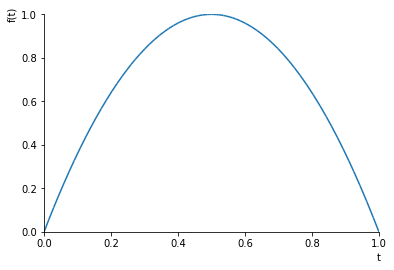

In [ ]:
p2=plot(GET,(t,0,1),show=False) #Solución gráfica GET
p2
p2.show()